In this notebook, we measure the sequence similarity between query sequences and PDB sequences using Smith-Waterman distance

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter

### Data

In [2]:
%store -r df_10k

In [3]:
len(df_10k.pdb_id.unique())

6087

In [4]:
df_10k['Lenght_difference']= df_10k['pdb_sequence_length'] - df_10k['query_sequence_length']

In [5]:
df_10k_5=df_10k[(df_10k["Lenght_difference"]>=-5) & (df_10k["Lenght_difference"]<=5)].copy()

In [6]:
df_10k_5

,query_sequences,query_sequence_length,pdb_sequence,pdb_sequence_length,pdb_id,e_value,percentage_identity,molecule_name,Lenght_difference
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,2mbd,1.100000e-13,100.0,[Lasiocepsin],0.0
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,2lt8,7.800000e-22,100.0,[Fungal defensin eurocin],0.0
2,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPNNYQCHRHCKSIPGRCGGYCGGWHRLRCTCYRCG,39.0,1fjn,4.500000e-06,52.5,[Defensin MGD-1],-3.0
3,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPFNENECHAHCLSIGRKFGFCAGPLRATCTCGKQ,38.0,2lr5,7.400000e-05,50.0,[micasin],-4.0
5,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPFNQGKCHRHCRSIRRRGGYCDGFLKQRCVCYRK,38.0,5xa6,8.500000e-04,45.0,[INVERT_DEFENSINS domain-containing protein],-4.0
...,...,...,...,...,...,...,...,...,...
66800,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,2mlt,1.000000e-03,100.0,[Melittin],-2.0
66801,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,6o4m,1.000000e-03,100.0,[Melittin],-2.0
66802,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,1bh1,1.000000e-03,100.0,[Melittin],-2.0
66803,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGKFLKKAKKGIGAVLKVLTTGL,24.0,2k98,4.800000e-02,76.2,[MSI-594],-5.0


In [7]:
#!{sys.executable} -m pip install textdistance
import textdistance

In [8]:
def get_smith_waterman_distance(data):
    """ Smith-Waterman performs a local alignment to find the best alignment over the conserved domain
    of two sequences. It is useful for dissimilar sequences that are suspected to contain regions of 
    similarity or similar sequence motifs within their larger sequence context. The Smith Waterman algorithm is 
    used to perform local alignments of sequence; it is helpful in determining identical regions between two protein 
    sequences. This algorithm compares segments of all possible lengths and optimizes similarity. This algorithm uses
    dynamic programming to find the optimal local alignment with respect to scoring system used. Compared to 
    Needleman-Wunsch Algorithm, this algorithm sets the negative scoring matrix cells to zero, thus positive score 
    are only visible for backtracking, which is done by starting with highest scoring matrix cell and proceeds until 
    a cell with zero is encountered, which gives the highest scoring local alignment. """
    
    SW_list = []
    
    for i in range(0, len(data)):
        
            SW_list_i =  round((textdistance.smith_waterman.normalized_similarity(str(data.query_sequences.iloc[i]), str(data.pdb_sequence.iloc[i])))*100, 1)
            SW_list.append(SW_list_i)
    
    return SW_list          

## All results

In [12]:
dist_all = get_smith_waterman_distance(df_10k) 
df_10k['Smith_Waterman_distance'] = dist_all
# df_10k.to_csv('./grampa_pdb_10k.csv')

## -5 to 5 length difference

In [13]:
dist_5 = get_smith_waterman_distance(df_10k_5)
df_10k_5['Smith_Waterman_distance'] = dist_5


In [14]:
df_10k_5

,query_sequences,query_sequence_length,pdb_sequence,pdb_sequence_length,pdb_id,e_value,percentage_identity,molecule_name,Lenght_difference,Smith_Waterman_distance
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,2mbd,1.100000e-13,100.0,[Lasiocepsin],0.0,100.0
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,2lt8,7.800000e-22,100.0,[Fungal defensin eurocin],0.0,100.0
2,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPNNYQCHRHCKSIPGRCGGYCGGWHRLRCTCYRCG,39.0,1fjn,4.500000e-06,52.5,[Defensin MGD-1],-3.0,43.6
3,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPFNENECHAHCLSIGRKFGFCAGPLRATCTCGKQ,38.0,2lr5,7.400000e-05,50.0,[micasin],-4.0,39.5
5,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPFNQGKCHRHCRSIRRRGGYCDGFLKQRCVCYRK,38.0,5xa6,8.500000e-04,45.0,[INVERT_DEFENSINS domain-containing protein],-4.0,31.6
...,...,...,...,...,...,...,...,...,...,...
66800,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,2mlt,1.000000e-03,100.0,[Melittin],-2.0,37.0
66801,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,6o4m,1.000000e-03,100.0,[Melittin],-2.0,37.0
66802,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,1bh1,1.000000e-03,100.0,[Melittin],-2.0,37.0
66803,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGKFLKKAKKGIGAVLKVLTTGL,24.0,2k98,4.800000e-02,76.2,[MSI-594],-5.0,37.5


In [7]:
df_10k_5 = pd.read_csv('./grampa_pdb_5_SWD_10k.csv', index_col=0)

In [8]:
df_10k_5

,query_sequences,query_sequence_length,pdb_sequence,pdb_sequence_length,pdb_id,e_value,percentage_identity,molecule_name,Lenght_difference,Smith_Waterman_distance
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27,GLPRKILCAIAKKKGKCKGPLKLVCKC,27,2mbd,1.100000e-13,100.0,['Lasiocepsin'],0,100.0
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,2lt8,7.800000e-22,100.0,['Fungal defensin eurocin'],0,100.0
2,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,GFGCPNNYQCHRHCKSIPGRCGGYCGGWHRLRCTCYRCG,39,1fjn,4.500000e-06,52.5,['Defensin MGD-1'],-3,43.6
3,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,GFGCPFNENECHAHCLSIGRKFGFCAGPLRATCTCGKQ,38,2lr5,7.400000e-05,50.0,['micasin'],-4,39.5
4,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,GFGCPFNQGKCHRHCRSIRRRGGYCDGFLKQRCVCYRK,38,5xa6,8.500000e-04,45.0,['INVERT_DEFENSINS domain-containing protein'],-4,31.6
...,...,...,...,...,...,...,...,...,...,...
11261,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29,GIGAVLKVLTTGLPALISWIKRKRQQX,27,2mlt,1.000000e-03,100.0,['Melittin'],-2,37.0
11262,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29,GIGAVLKVLTTGLPALISWIKRKRQQX,27,6o4m,1.000000e-03,100.0,['Melittin'],-2,37.0
11263,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29,GIGAVLKVLTTGLPALISWIKRKRQQX,27,1bh1,1.000000e-03,100.0,['Melittin'],-2,37.0
11264,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29,GIGKFLKKAKKGIGAVLKVLTTGL,24,2k98,4.800000e-02,76.2,['MSI-594'],-5,37.5


# EDA

In [9]:
df_10k_5.molecule_name = df_10k_5.molecule_name.astype(str)

In [10]:
len(Counter(df_10k_5.molecule_name))

539

In [11]:
df_10k_5

,query_sequences,query_sequence_length,pdb_sequence,pdb_sequence_length,pdb_id,e_value,percentage_identity,molecule_name,Lenght_difference,Smith_Waterman_distance
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27,GLPRKILCAIAKKKGKCKGPLKLVCKC,27,2mbd,1.100000e-13,100.0,['Lasiocepsin'],0,100.0
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,2lt8,7.800000e-22,100.0,['Fungal defensin eurocin'],0,100.0
2,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,GFGCPNNYQCHRHCKSIPGRCGGYCGGWHRLRCTCYRCG,39,1fjn,4.500000e-06,52.5,['Defensin MGD-1'],-3,43.6
3,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,GFGCPFNENECHAHCLSIGRKFGFCAGPLRATCTCGKQ,38,2lr5,7.400000e-05,50.0,['micasin'],-4,39.5
4,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42,GFGCPFNQGKCHRHCRSIRRRGGYCDGFLKQRCVCYRK,38,5xa6,8.500000e-04,45.0,['INVERT_DEFENSINS domain-containing protein'],-4,31.6
...,...,...,...,...,...,...,...,...,...,...
11261,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29,GIGAVLKVLTTGLPALISWIKRKRQQX,27,2mlt,1.000000e-03,100.0,['Melittin'],-2,37.0
11262,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29,GIGAVLKVLTTGLPALISWIKRKRQQX,27,6o4m,1.000000e-03,100.0,['Melittin'],-2,37.0
11263,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29,GIGAVLKVLTTGLPALISWIKRKRQQX,27,1bh1,1.000000e-03,100.0,['Melittin'],-2,37.0
11264,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29,GIGKFLKKAKKGIGAVLKVLTTGL,24,2k98,4.800000e-02,76.2,['MSI-594'],-5,37.5


In [12]:
df_10k_filt = df_10k_5[df_10k_5.Smith_Waterman_distance>=70]

In [13]:
df_10k_filt.describe()

,query_sequence_length,pdb_sequence_length,e_value,percentage_identity,Lenght_difference,Smith_Waterman_distance
count,3158.000000,3158.000000,3.158000e+03,3158.000000,3158.000000,3158.000000
mean,32.960101,33.308106,8.793577e-05,91.104370,0.348005,88.115896
std,17.540784,17.672443,1.483771e-03,8.314176,1.359226,8.651241
min,15.000000,20.000000,2.700000e-69,64.500000,-5.000000,70.000000
25%,22.000000,23.000000,4.000000e-17,86.200000,0.000000,82.600000
50%,26.000000,26.000000,7.400000e-11,94.100000,0.000000,90.500000
75%,39.000000,38.000000,9.325000e-09,97.500000,1.000000,95.500000
max,140.000000,140.000000,5.200000e-02,100.000000,5.000000,100.000000


In [17]:
mol=Counter(df_10k_filt.molecule_name)
y=[count for tag, count in mol.most_common(10)]
x=[tag for tag, count in mol.most_common(10)]

<Figure size 576x432 with 0 Axes>

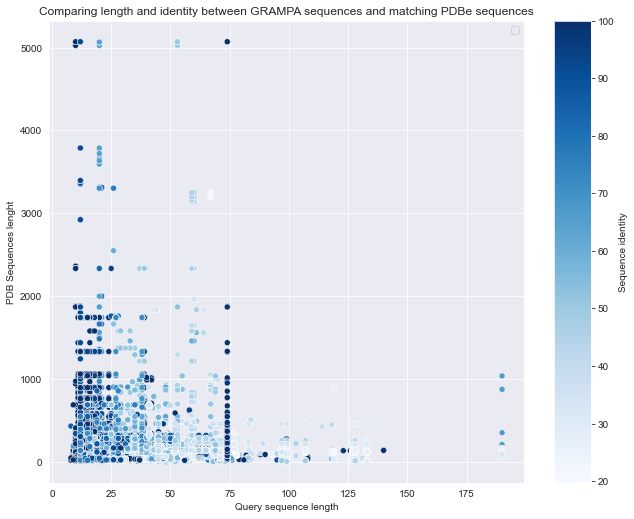

In [ ]:
plt.figure(figsize = (8, 6))
fig, ax = plt.subplots()
ax=sns.scatterplot(data=df_10k_filt, x="query_sequence_length", y="pdb_sequence_length", hue="percentage_identity", palette=sns.color_palette("Blues", as_cmap=True))
ax.legend([])
plt.xlabel("Query sequence length")
plt.ylabel("PDB Sequences lenght")
plt.title("Comparing length and identity between GRAMPA sequences and matching PDBe sequences")
sns.set_style("darkgrid")

norm = plt.Normalize(test['percentage_identity'].min(), test['percentage_identity'].max())
cmap = sns.color_palette("Blues", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height ])
ax.figure.colorbar(sm, cax=cax, label='Sequence identity')
fig.set_tight_layout(False)
plt.savefig('Fig1C.png', dpi=1000, bbox_inches='tight')

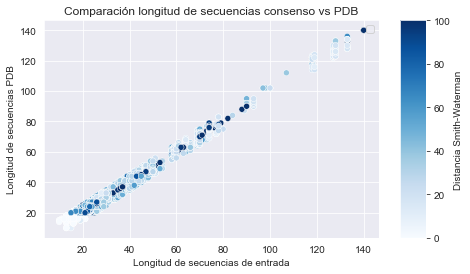

In [ ]:
fig, ax = plt.subplots()
ax=sns.scatterplot(data=df_10k_filt, x="query_sequence_length", y="pdb_sequence_length", hue="Smith_Waterman_distance", palette=sns.color_palette("Blues", as_cmap=True))
ax.legend([])
plt.xlabel("Longitud de secuencias de entrada")
plt.ylabel("Longitud de secuencias PDB")
plt.title("Comparación longitud de secuencias consenso vs PDB")
sns.set_style("darkgrid")

norm = plt.Normalize(res_df_SWD['Smith_Waterman_distance'].min(), res_df_SWD['Smith_Waterman_distance'].max())
cmap = sns.color_palette("Blues", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height ])
ax.figure.colorbar(sm, cax=cax, label='Distancia Smith-Waterman')
plt.show()

In [ ]:
mol=Counter(df_10k_filt.molecule_name)
y=[count for tag, count in mol.most_common(10)]
x=[tag for tag, count in mol.most_common(10)]

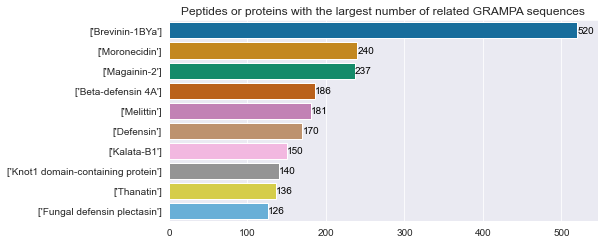

In [ ]:
sns.set_style("darkgrid")
sns.barplot(x=y, y=x, palette='colorblind')
plt.title("Peptides or proteins with the largest number of related GRAMPA sequences", size=12)
plt.rcParams["figure.figsize"] = [8.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for index, value in enumerate(y):
    plt.text(value, index, str(value), color="black", ha='left', va='center', size='medium')
plt.savefig('Fig1b.png', dpi=500)

In [ ]:
mol=Counter(res_5_SWD.molecule_name)
y=[count for tag, count in mol.most_common(10)]
x=[tag for tag, count in mol.most_common(10)]

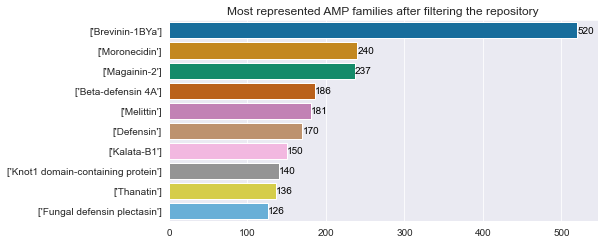

In [ ]:
sns.set_style("darkgrid")
sns.barplot(x=y, y=x, palette='colorblind')
plt.title("Most represented AMP families after filtering the repository", size=12)
plt.rcParams["figure.figsize"] = [8.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for index, value in enumerate(y):
    plt.text(value, index, str(value), color="black", ha='left', va='center', size='medium')
plt.savefig('Fig1D.png', dpi=500)